In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Step 1: Load crime count CSV (exported from Spark)
crime_df = pd.read_csv("crime_map_district.csv")

# Optional: check the first few rows
print(crime_df.head())

# Step 2: Load LAPD district boundaries GeoJSON or Shapefile
# Make sure this file is downloaded and accessible
la_districts = gpd.read_file("LAPD_Division.geojson")

# Optional: inspect column names in the shapefile
print(la_districts.columns)

   AREA    AREA_NAME  count
0     1      Central  69673
1    12  77th Street  61762
2    14      Pacific  59521
3     3    Southwest  57512
4     6    Hollywood  52430
Index(['OBJECTID', 'APREC', 'PREC', 'AREA', 'PERIMETER', 'geometry'], dtype='object')


In [3]:
print(la_districts["APREC"].unique())


['MISSION' 'DEVONSHIRE' 'FOOTHILL' 'TOPANGA' 'WEST VALLEY'
 'NORTH HOLLYWOOD' 'VAN NUYS' 'NORTHEAST' 'HOLLYWOOD' 'WEST LOS ANGELES'
 'HOLLENBECK' 'RAMPART' 'WILSHIRE' 'OLYMPIC' 'SOUTHWEST' 'NEWTON'
 'PACIFIC' '77TH STREET' 'SOUTHEAST' 'HARBOR' 'CENTRAL']


In [4]:
la_districts["APREC"] = la_districts["APREC"].str.upper()
crime_df["AREA_NAME"] = crime_df["AREA_NAME"].str.upper()

merged = la_districts.merge(crime_df, left_on="APREC", right_on="AREA_NAME")


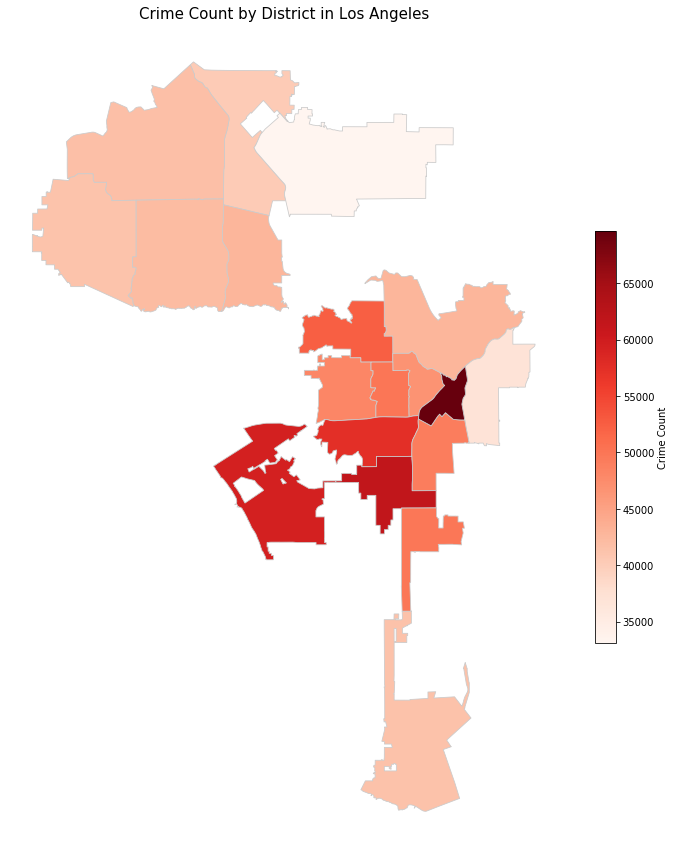

In [5]:
fig, ax = plt.subplots(figsize=(10, 12))
merged.plot(
    column="count",
    cmap="Reds",
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
    legend=True,
    legend_kwds={"label": "Crime Count", "shrink": 0.5}
)

ax.set_title("Crime Count by District in Los Angeles", fontdict={"fontsize": 15})
ax.axis("off")
plt.tight_layout()
plt.show()

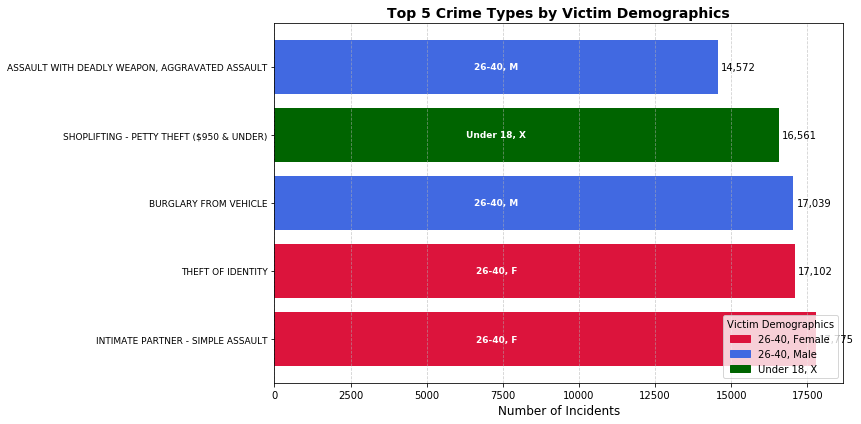

In [6]:
# Create dataframe from the top 5 crime types by victim demographics
data = [
    ["INTIMATE PARTNER - SIMPLE ASSAULT", "26-40", "F", 17775],
    ["THEFT OF IDENTITY", "26-40", "F", 17102],
    ["BURGLARY FROM VEHICLE", "26-40", "M", 17039],
    ["SHOPLIFTING - PETTY THEFT ($950 & UNDER)", "Under 18", "X", 16561],
    ["ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT", "26-40", "M", 14572]
]

# Create DataFrame
df = pd.DataFrame(data, columns=["crm_cd_desc", "age_group", "vict_sex", "count"])

# Convert count to numeric
df["count"] = pd.to_numeric(df["count"])

# Create a color map for different demographic combinations
color_map = {
    ("26-40", "F"): "crimson",
    ("26-40", "M"): "royalblue",
    ("Under 18", "X"): "darkgreen"
}

# Create a list of colors based on the demographic combinations
colors = [color_map.get((row["age_group"], row["vict_sex"]), "gray") for _, row in df.iterrows()]

# Create figure and axis
plt.figure(figsize=(12, 6))

# Create horizontal bar chart
bars = plt.barh(
    np.arange(len(df)), 
    df["count"],
    color=colors
)

# Set y-axis tick labels to crime descriptions
plt.yticks(
    np.arange(len(df)), 
    df["crm_cd_desc"],
    fontsize=9
)

# Add count labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 100,        # x position
        bar.get_y() + bar.get_height()/2,  # y position
        f'{int(width):,}',  # formatted count
        ha='left',
        va='center',
        fontsize=10
    )

# Add demographic information in the bars
for i, (_, row) in enumerate(df.iterrows()):
    plt.text(
        df["count"].min()/2,  # x position
        i,                     # y position
        f"{row['age_group']}, {row['vict_sex']}",
        ha='center',
        va='center',
        fontsize=9,
        color='white',
        fontweight='bold'
    )

# Create a custom legend for demographics
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, color=color_map[("26-40", "F")], label="26-40, Female"),
    plt.Rectangle((0, 0), 1, 1, color=color_map[("26-40", "M")], label="26-40, Male"),
    plt.Rectangle((0, 0), 1, 1, color=color_map[("Under 18", "X")], label="Under 18, X")
]
plt.legend(handles=legend_elements, loc='lower right', title="Victim Demographics")

# Set labels and title
plt.xlabel('Number of Incidents', fontsize=12)
plt.title('Top 5 Crime Types by Victim Demographics', fontsize=14, fontweight='bold')

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

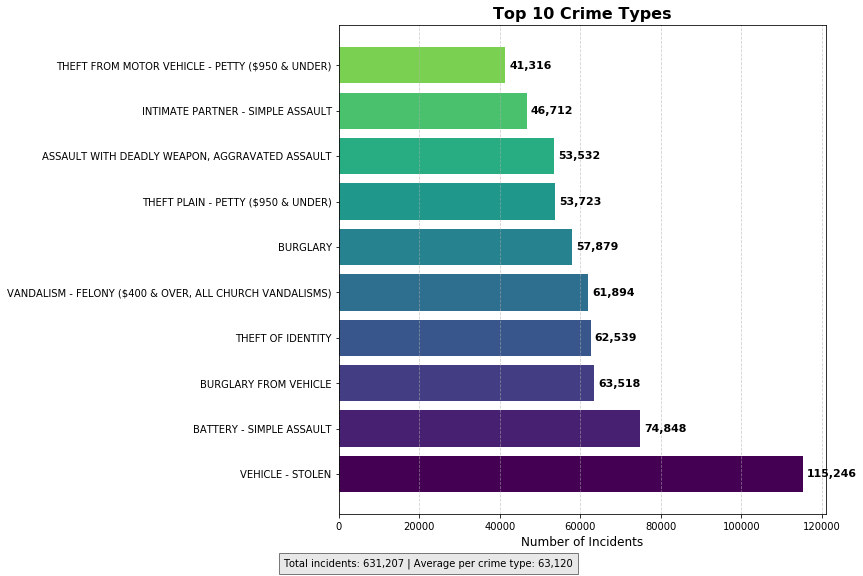

In [7]:
# Create dataframe from the top 10 crime types data
data = [
    ["VEHICLE - STOLEN", 115246],
    ["BATTERY - SIMPLE ASSAULT", 74848],
    ["BURGLARY FROM VEHICLE", 63518],
    ["THEFT OF IDENTITY", 62539],
    ["VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)", 61894],
    ["BURGLARY", 57879],
    ["THEFT PLAIN - PETTY ($950 & UNDER)", 53723],
    ["ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT", 53532],
    ["INTIMATE PARTNER - SIMPLE ASSAULT", 46712],
    ["THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)", 41316]
]

# Create DataFrame
df = pd.DataFrame(data, columns=["crm_cd_desc", "count"])

# Convert count to numeric
df["count"] = pd.to_numeric(df["count"])

# Sort by count for visualization (descending order)
df = df.sort_values(by="count", ascending=False)

# Create figure and axis
plt.figure(figsize=(12, 8))

# Create horizontal bar chart with a color gradient
colors = plt.cm.viridis(np.linspace(0, 0.8, len(df)))
bars = plt.barh(np.arange(len(df)), df["count"], color=colors)

# Set y-axis tick labels to crime descriptions
plt.yticks(
    np.arange(len(df)), 
    df["crm_cd_desc"],
    fontsize=10
)

# Add count labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 1000,  # x position
        bar.get_y() + bar.get_height()/2,  # y position
        f'{int(width):,}',  # formatted count
        ha='left',
        va='center',
        fontsize=11,
        fontweight='bold'
    )

# Set labels and title
plt.xlabel('Number of Incidents', fontsize=12)
plt.title('Top 10 Crime Types', fontsize=16, fontweight='bold')

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add a brief statistics summary
total_incidents = df["count"].sum()
plt.figtext(
    0.5, 0.01, 
    f"Total incidents: {total_incidents:,} | Average per crime type: {int(total_incidents/len(df)):,}",
    ha="center", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5}
)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # Make room for the summary text

# Show plot
plt.show()

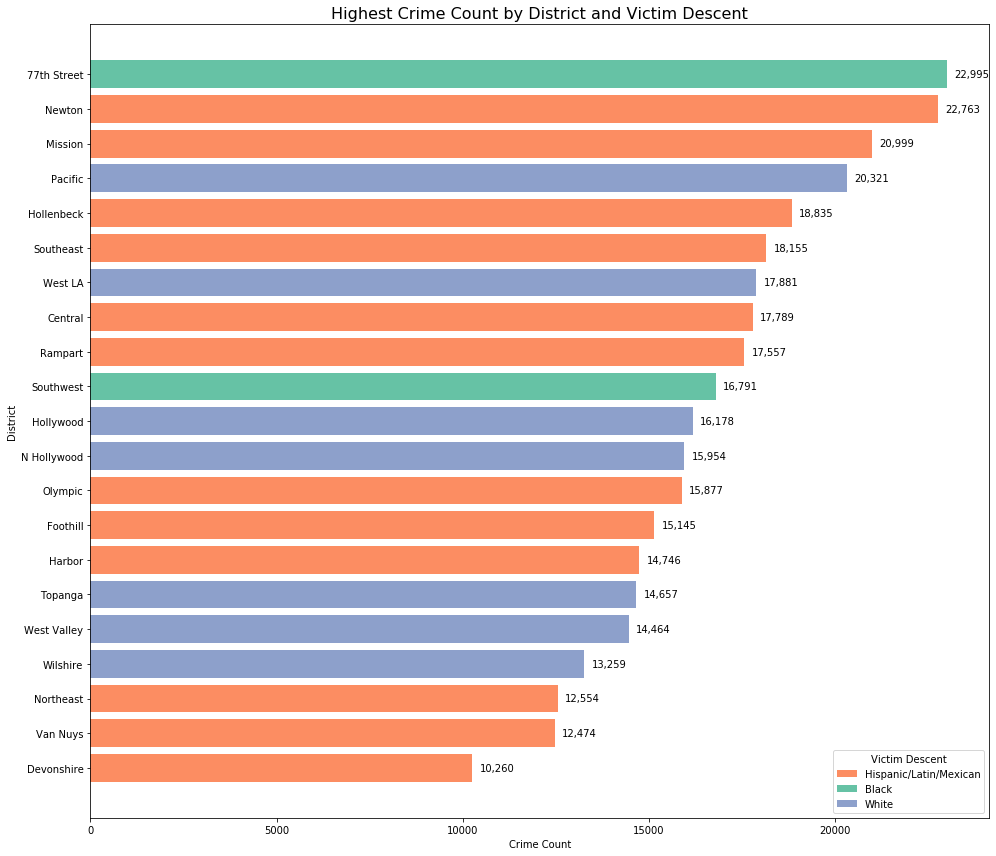

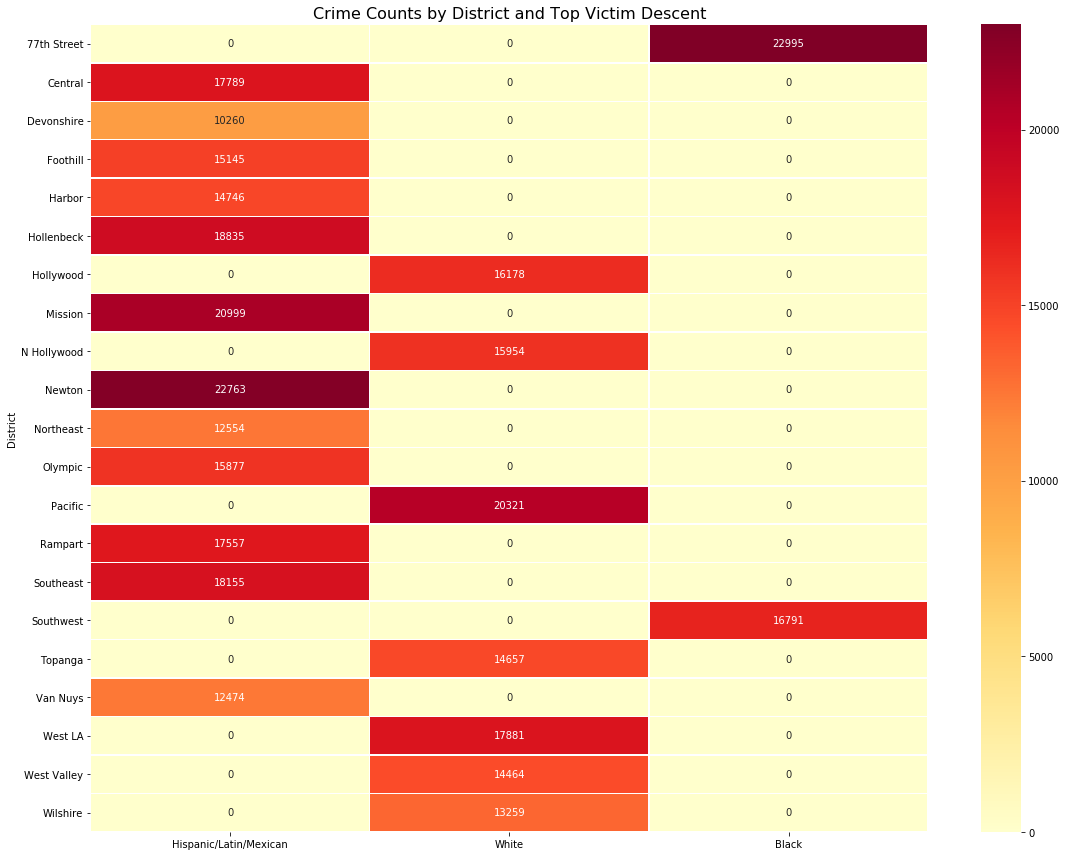

In [8]:
data = [
    ["77th Street", "Black", 22995],
    ["Central", "Hispanic/Latin/Mexican", 17789],
    ["Devonshire", "Hispanic/Latin/Mexican", 10260],
    ["Foothill", "Hispanic/Latin/Mexican", 15145],
    ["Harbor", "Hispanic/Latin/Mexican", 14746],
    ["Hollenbeck", "Hispanic/Latin/Mexican", 18835],
    ["Hollywood", "White", 16178],
    ["Mission", "Hispanic/Latin/Mexican", 20999],
    ["N Hollywood", "White", 15954],
    ["Newton", "Hispanic/Latin/Mexican", 22763],
    ["Northeast", "Hispanic/Latin/Mexican", 12554],
    ["Olympic", "Hispanic/Latin/Mexican", 15877],
    ["Pacific", "White", 20321],
    ["Rampart", "Hispanic/Latin/Mexican", 17557],
    ["Southeast", "Hispanic/Latin/Mexican", 18155],
    ["Southwest", "Black", 16791],
    ["Topanga", "White", 14657],
    ["Van Nuys", "Hispanic/Latin/Mexican", 12474],
    ["West LA", "White", 17881],
    ["West Valley", "White", 14464],
    ["Wilshire", "White", 13259]  
]

# Create DataFrame
df = pd.DataFrame(data, columns=["District", "Top_Victim_Descent", "Crime_Count"])

# Create color mapping for descent groups
colors = {
    "Hispanic/Latin/Mexican": "#FC8D62",
    "Black": "#66C2A5", 
    "White": "#8DA0CB",
    "Other": "#E78AC3",
    "Other Asian": "#A6D854"
}

# Plot 1: Horizontal bar chart of crime counts by district, colored by victim descent
plt.figure(figsize=(14, 12))
# Sort by crime count
df_sorted = df.sort_values("Crime_Count", ascending=True)
# Create color list based on descent
bar_colors = [colors[descent] for descent in df_sorted["Top_Victim_Descent"]]

# Create horizontal bar chart
bars = plt.barh(df_sorted["District"], df_sorted["Crime_Count"], color=bar_colors)
plt.xlabel("Crime Count")
plt.ylabel("District")
plt.title("Highest Crime Count by District and Victim Descent", fontsize=16)

# Add values to the end of bars
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 200, 
             bar.get_y() + bar.get_height()/2, 
             f"{int(df_sorted.iloc[i]['Crime_Count']):,}", 
             va='center')

# Create legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[key], label=key) for key in colors if key in df["Top_Victim_Descent"].unique()]
plt.legend(handles=legend_elements, title="Victim Descent", loc="lower right")

plt.tight_layout()
plt.savefig("district_crime_by_descent.png", dpi=300)
plt.show()


# Plot 3: Grouped bar chart showing multiple descents per district
# This would be best if we had all top 5 for each district, but we can create
# a placeholder with the data we have

# Let's create a heatmap showing the concentration of Hispanic/White/Black victims
# Create a DataFrame with 1 where that district has that descent as top
plt.figure(figsize=(16, 12))
district_descent_matrix = pd.DataFrame(0, 
                                       index=df["District"], 
                                       columns=["Hispanic/Latin/Mexican", "White", "Black"])

for _, row in df.iterrows():
    district_descent_matrix.loc[row["District"], row["Top_Victim_Descent"]] = row["Crime_Count"]

# Create a heatmap
sns.heatmap(district_descent_matrix, cmap="YlOrRd", annot=True, fmt="g", linewidths=.5)
plt.title("Crime Counts by District and Top Victim Descent", fontsize=16)
plt.tight_layout()
plt.savefig("district_descent_heatmap.png", dpi=300)
plt.show()


# Plot 4: Map visualization (if coordinates available)
# This would require latitude and longitude for districts
# which doesn't appear to be in the provided data snippet

In [10]:
la_districts

,OBJECTID,APREC,PREC,AREA,PERIMETER,geometry
0,1,MISSION,19,6.995826e+08,190817.495739,"POLYGON ((-118.50736 34.33464, -118.50381 34.3..."
1,2,DEVONSHIRE,17,1.346816e+09,175591.702871,"POLYGON ((-118.50736 34.33464, -118.50668 34.3..."
2,3,FOOTHILL,16,1.297385e+09,203717.879169,"POLYGON ((-118.41581 34.29384, -118.41567 34.2..."
3,4,TOPANGA,21,9.090326e+08,155505.795458,"POLYGON ((-118.63166 34.23858, -118.63151 34.2..."
4,5,WEST VALLEY,10,9.364057e+08,136316.899694,"POLYGON ((-118.56229 34.22035, -118.56184 34.2..."
5,6,NORTH HOLLYWOOD,15,6.346011e+08,187366.252732,"POLYGON ((-118.34264 34.11645, -118.34270 34.1..."
6,7,VAN NUYS,9,4.896950e+08,116288.308461,"POLYGON ((-118.47325 34.21651, -118.47313 34.2..."
7,8,NORTHEAST,11,8.156022e+08,178460.722082,"POLYGON ((-118.32904 34.15022, -118.32902 34.1..."
8,9,HOLLYWOOD,6,3.718353e+08,115808.747099,"POLYGON ((-118.34695 34.11831, -118.34694 34.1..."
9,10,WEST LOS ANGELES,8,1.803659e+09,295206.415546,"POLYGON ((-118.51758 34.02506, -118.51762 34.0..."


In [16]:
data = {
    "District": [
        "77th Street", "Central", "Devonshire", "Foothill", "Harbor", "Hollenbeck",
        "Hollywood", "Mission", "N Hollywood", "Newton", "Northeast", "Olympic",
        "Pacific", "Rampart", "Southeast", "Southwest", "Topanga", "Van Nuys",
        "West LA", "West Valley", "Wilshere"
    ],
    "Top_Victim_Group": [
        "Black", "Hispanic/Latin/Mexican", "Hispanic/Latin/Mexican", "Hispanic/Latin/Mexican",
        "Hispanic/Latin/Mexican", "Hispanic/Latin/Mexican", "White", "Hispanic/Latin/Mexican",
        "White", "Hispanic/Latin/Mexican", "Hispanic/Latin/Mexican", "Hispanic/Latin/Mexican",
        "White", "Hispanic/Latin/Mexican", "Hispanic/Latin/Mexican", "Black", "White",
        "Hispanic/Latin/Mexican", "White", "White", "White"
    ],
    "Victim_Count": [
        22995, 17789, 10260, 15145, 14746, 18835, 16178, 20999, 15954, 22763, 12554,
        15877, 20321, 17557, 18155, 16791, 14657, 12474, 17881, 14464, 13259
    ]
}

victim_df = pd.DataFrame(data)

In [17]:
# Capitalize district names in both GeoDataFrame and DataFrame
la_districts["APREC"] = la_districts["APREC"].str.strip().str.upper()
victim_df["District"] = victim_df["District"].str.strip().str.upper()

# Merge based on capitalized names
merged = la_districts.merge(victim_df, how="left", left_on="APREC", right_on="District")

In [18]:
print(merged[["APREC", "Victim_Count"]].dropna().head(10))

          APREC  Victim_Count
0       MISSION       20999.0
1    DEVONSHIRE       10260.0
2      FOOTHILL       15145.0
3       TOPANGA       14657.0
4   WEST VALLEY       14464.0
6      VAN NUYS       12474.0
7     NORTHEAST       12554.0
8     HOLLYWOOD       16178.0
10   HOLLENBECK       18835.0
11      RAMPART       17557.0


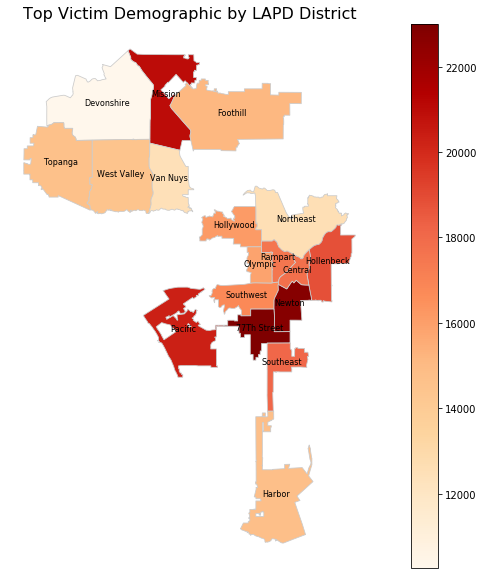

In [20]:
# 4. Plot
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
merged.plot(column='Victim_Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate districts (optional)
for idx, row in merged.iterrows():
    if pd.notnull(row["Victim_Count"]) and row.geometry is not None:
        plt.annotate(
            row["APREC"].title(),
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            horizontalalignment='center',
            fontsize=8,
            color='black'
        )

plt.title("Top Victim Demographic by LAPD District", fontsize=16)
plt.axis("off")
plt.show()

No handles with labels found to put in legend.


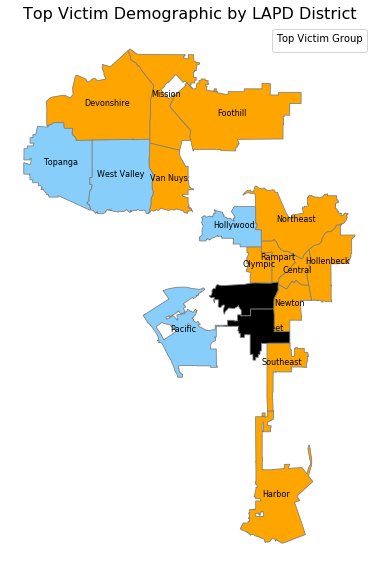

In [22]:
from matplotlib.patches import Patch

# Create manual legend patches
legend_elements = [
    Patch(facecolor="#FFA500", edgecolor='gray', label="Hispanic/Latin/Mexican"),
    Patch(facecolor="#000000", edgecolor='gray', label="Black"),
    Patch(facecolor="#87CEFA", edgecolor='gray', label="White")
]


# Load GeoJSON and clean names
la_districts = gpd.read_file("LAPD_Division.geojson")
la_districts["APREC"] = la_districts["APREC"].str.strip().str.upper()

# Victim demographic data
data = {
    "District": [
        "77th Street", "Central", "Devonshire", "Foothill", "Harbor", "Hollenbeck",
        "Hollywood", "Mission", "N Hollywood", "Newton", "Northeast", "Olympic",
        "Pacific", "Rampart", "Southeast", "Southwest", "Topanga", "Van Nuys",
        "West LA", "West Valley", "Wilshere"
    ],
    "Top_Victim_Group": [
        "Black", "Hispanic/Latin/Mexican", "Hispanic/Latin/Mexican", "Hispanic/Latin/Mexican",
        "Hispanic/Latin/Mexican", "Hispanic/Latin/Mexican", "White", "Hispanic/Latin/Mexican",
        "White", "Hispanic/Latin/Mexican", "Hispanic/Latin/Mexican", "Hispanic/Latin/Mexican",
        "White", "Hispanic/Latin/Mexican", "Hispanic/Latin/Mexican", "Black", "White",
        "Hispanic/Latin/Mexican", "White", "White", "White"
    ],
    "Victim_Count": [
        22995, 17789, 10260, 15145, 14746, 18835, 16178, 20999, 15954, 22763, 12554,
        15877, 20321, 17557, 18155, 16791, 14657, 12474, 17881, 14464, 13259
    ]
}
victim_df = pd.DataFrame(data)
victim_df["District"] = victim_df["District"].str.strip().str.upper()

# Merge data
merged = la_districts.merge(victim_df, how="left", left_on="APREC", right_on="District")

# Reproject if needed
if merged.crs is None or merged.crs.to_string() != "EPSG:4326":
    merged = merged.to_crs(epsg=4326)

# Define color mapping
color_map = {
    "HISPANIC/LATIN/MEXICAN": "#FFA500",  # Orange
    "BLACK": "#000000",                   # Black
    "WHITE": "#87CEFA"                    # Light Blue
}

# Standardize values
merged["Top_Victim_Group"] = merged["Top_Victim_Group"].str.upper()

# Start plotting
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Plot each demographic group
for group, color in color_map.items():
    subset = merged[merged["Top_Victim_Group"] == group]
    subset.plot(ax=ax, color=color, label=group.title(), edgecolor="gray", linewidth=0.8)

# Annotate districts
for idx, row in merged.iterrows():
    if pd.notnull(row["Victim_Count"]) and row.geometry is not None:
        plt.annotate(
            row["APREC"].title(),
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            ha='center',
            fontsize=8,
            color='black'
        )

# Add legend
plt.legend(title="Top Victim Group")
plt.title("Top Victim Demographic by LAPD District", fontsize=16)
plt.axis("off")
plt.show()